In [1]:
import numpy as np
import pandas as pd
import matplotlib
from pandas.plotting import parallel_coordinates
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# https://www.kaggle.com/shivamb/makeup-shades-dataset
# Group column meanings: 0: Fenty Beauty's PRO FILT'R Foundation Only • 1: Make Up For Ever's Ultra HD Foundation Only • 2: US Best Sellers• 3: BIPOC-recommended Brands with BIPOC Founders • 4: BIPOC-recommended Brands with White Founders • 5: Nigerian Best Sellers• 6: Japanese Best Sellers • 7: Indian Best Sellers
df = pd.read_csv('C:\\Users\\thesk\\eclipse-workspace\\tSNE\\shades.csv')

In [3]:
df.head(3)

,brand,brand_short,product,product_short,hex,Hue,Saturation,Value,Lightness,Group
0,Maybelline,mb,Fit Me,fmf,f3cfb3,26.0,0.26,0.95,86,2
1,Maybelline,mb,Fit Me,fmf,ffe3c2,32.0,0.24,1.00,92,2
2,Maybelline,mb,Fit Me,fmf,ffe0cd,23.0,0.20,1.00,91,2


In [4]:
# Saving df column names in memory or, more precisely, assigning them to a variable
# to use later when turning a pre-processed data array back into a dataframe
features=list(df.columns)

In [5]:
from IPython.display import Markdown
display (Markdown('hex <span style="color: #f3cfb3">f3cfb3</span> color'))
display (Markdown('hex <span style="color: #ffe3c2">ffe3c2</span> color'))
display (Markdown('hex <span style="color: #ffe0cd">ffe0cd</span> color'))

hex <span style="color: #f3cfb3">f3cfb3</span> color

hex <span style="color: #ffe3c2">ffe3c2</span> color

hex <span style="color: #ffe0cd">ffe0cd</span> color

In [6]:
df.dtypes

brand             object
brand_short       object
product           object
product_short     object
hex               object
Hue              float64
Saturation       float64
Value            float64
Lightness          int64
Group              int64
dtype: object

In [7]:
# Drop the id column if exists
#df = df.drop('ID',axis=1)

In [8]:
# List of numerical features: 
X_num = df.select_dtypes(include=[np.number])
num_features = list(X_num)
print(num_features)

# List of categorical features: 
X_cat = df.select_dtypes(include=['object'])
cat_features = list(X_cat)
print(cat_features)

['Hue', 'Saturation', 'Value', 'Lightness', 'Group']
['brand', 'brand_short', 'product', 'product_short', 'hex']


### Missing values
Most ml models cannot process missing values.<br>
In this dataset, we will replace the missing values with median and for categorical variables such as hex colors, with the most frequent values.<br>

In [9]:
# Check which columns have nan values
nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['Hue', 'Saturation', 'Value']


In [10]:
df.replace('', np.NaN)
df.head(3)

,brand,brand_short,product,product_short,hex,Hue,Saturation,Value,Lightness,Group
0,Maybelline,mb,Fit Me,fmf,f3cfb3,26.0,0.26,0.95,86,2
1,Maybelline,mb,Fit Me,fmf,ffe3c2,32.0,0.24,1.00,92,2
2,Maybelline,mb,Fit Me,fmf,ffe0cd,23.0,0.20,1.00,91,2


In [11]:
# ColumnTransformer cannot do multiple transforms on a single column, always takes the original df as input
# Use Pipeline for multiple steps on a single column as Pipeline takes previous step's output as next step's input
# ColumnTransformer has a three-element tuple: the name of the transformer, the transform to apply, and the column indices

num_pipe = Pipeline(steps=[('i',SimpleImputer(missing_values=np.nan, strategy="median"))])

cat_pipe = Pipeline(steps=[('i',SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
                            ('oe',OrdinalEncoder())])

ct = ColumnTransformer(transformers=[('num',num_pipe,num_features),
                                    ('cat',cat_pipe,cat_features)],remainder="passthrough")  #the default value is ‘drop’ which drops the other columns and returns only the transformed ones, but we want the entire df, it is not neccesary to transform the target variable

X = ct.fit_transform(df) # fit.transform turns the dataframe into an array

In [12]:
# Turning the pre-processed array back into a dataframe for later use
# df_pp = pd.DataFrame(X,columns=features)
# df_pp.head(2)

# t-SNE
(t-distributed Stochastic Neighbor Embedding) for projections of many-dimensional datasets.<br>
It is iterative (each time it runs, it could produce a different result) therefore unlike PCA cannot be applied on another dataset. And unlike PCA, it achieves nonlinear dimensionality reduction by creating a probability distribution that represents similarities between neighbors, or, basically, it creates low-dimensional space with the same number of points as in the original space.<br>
A perplexity is like a target number of neighbors for our central point.  Perplexity=10 means searching the right probability value to fit 10 neighbors. Loosely speaking, a larger dataset requires a larger perplexity. According to the original paper, typical values range between 5 and 50.<br>
It is called t-Sne because to find similar probability distribution in low-dimensional space the algorithm uses Student t-distribution with a single degree of freedom instead of Gaussian distribution which has “short tail” and thus creates a crowding problem.<br>
tSNE algorithm has its own built-in normalizing therefore we did not include normalizing in the data pre-processing pipeline.

### 2D tSNE

In [20]:
# Smaller perplexity will mean looking just at the closest neighbors and consequently will create many small groups
X2 = TSNE(n_components=2, learning_rate=10, init='random',verbose=1, perplexity=50, n_iter=2000).fit_transform(X)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 625 samples in 0.002s...
[t-SNE] Computed neighbors for 625 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 625 / 625
[t-SNE] Mean sigma: 24.626748
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.898491
[t-SNE] KL divergence after 2000 iterations: 0.276719


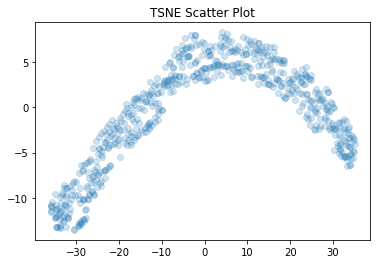

In [21]:
plt.scatter(X2[:,0],X2[:,1], cmap = "coolwarm", alpha=0.2)
plt.title('TSNE Scatter Plot')
plt.show()

It would make sense that most of our data stick together like in the time-series analysis: makeup hue and saturation, and lightness values are similar to the values next to them, with no distinct clusters. Rather, the values are quite continuous.

If we recall the principal components' analysis done on the same dataset for KMeans algorithm, their chart showed parralel lines (adding a quick PCA chart here for an exhibit although on non-standardized data therefore it slightly differs from the KMeans file). 

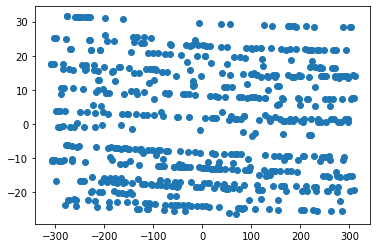

In [22]:
pca = PCA(n_components = 2)
pc = pca.fit_transform(X)
pc_df = pd.DataFrame(data = pc, columns = ['pc 1', 'pc 2'])

plt.scatter(pc[:,0],pc[:,1])
plt.show()

So, we should be seeing straight contonuous lines in tSNE. However, tSNE is maximizing the distance between clusters while minimising the distance between datapoints within clusters and circles naturally arise for the sake of efficiency.

Let's color the tSNE chart by some of our features to look for any patterns.

In [23]:
# Adding two tsne dimensions to the original dataset
df['tsne-2d-1'] = X2[:,0]
df['tsne-2d-2'] = X2[:,1]

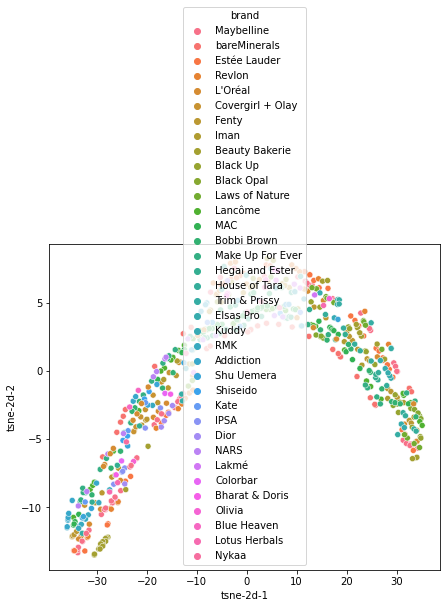

In [24]:
plt.figure(figsize=(7,6))
sns.scatterplot(x = 'tsne-2d-1', y = 'tsne-2d-2',hue='brand',data=df) #, palette=['blue',"pink"])
plt.show()

No patterns if colorcoding by Brand. All brands seem scattered along all datapoints.

<AxesSubplot:xlabel='tsne-2d-1', ylabel='tsne-2d-2'>

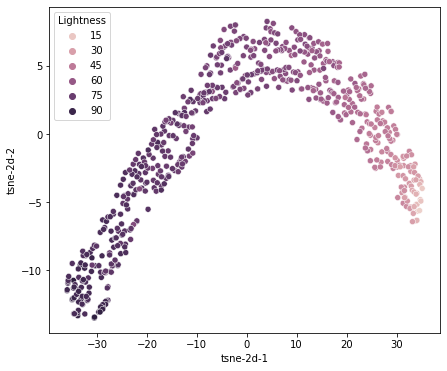

In [25]:
plt.figure(figsize=(7,6))
sns.scatterplot(x = 'tsne-2d-1', y = 'tsne-2d-2',hue='Lightness',data=df) #, palette=['blue',"pink"])

Whereas Lightness shows a beautiful pattern of all similarly light/dark make-up foundations being close to each other.

### TSNE 3 dimensions

In [29]:
tsne = TSNE(n_components=3, learning_rate=10, init='random', verbose=1, perplexity=55, n_iter=2000).fit_transform(X)

[t-SNE] Computing 166 nearest neighbors...
[t-SNE] Indexed 625 samples in 0.001s...
[t-SNE] Computed neighbors for 625 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 625 / 625
[t-SNE] Mean sigma: 25.971738
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.630375
[t-SNE] KL divergence after 2000 iterations: 0.163487


In [30]:
df['tsne3d1'] = tsne[:,0]
df['tsne3d2'] = tsne[:,1]
df['tsne3d3'] = tsne[:,2]

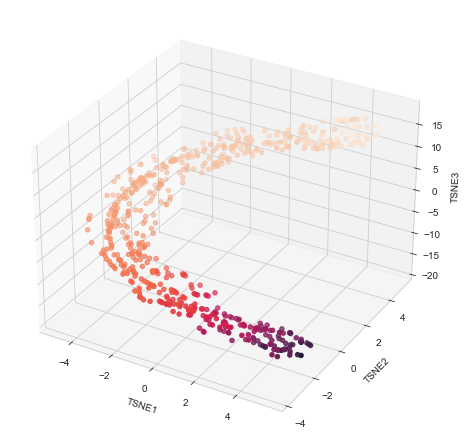

In [31]:
# Code for continuous variables
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False) # or ax = fig.add_subplot(111, projection='3d')
fig.add_axes(ax)

x=df['tsne3d1']
y=df['tsne3d2']
z=df['tsne3d3']

ax.scatter(x, y, z, c=df['Value'], marker='o')  # c argument must be a color, a sequence of colors, or a sequence of numbers
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')

plt.show()

The 3D chart is very similar to 2D, the same circle just more spatial.<br>
It shows how similar make-up lightness values are close to each other (the lightness value of each color was extracted using the Photoshop's CIE Lab color model).<br>
Similarly, no groupings are apparent when colorcoded by categorical variables:

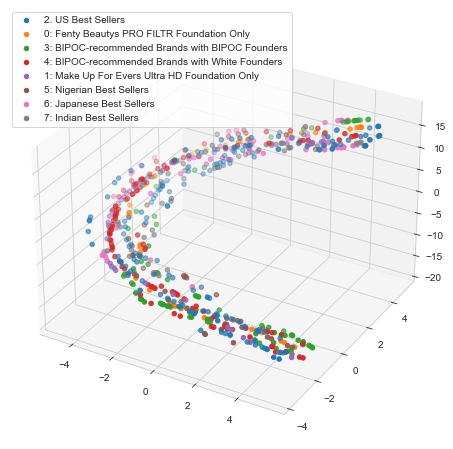

In [32]:
# Different code for categorical variables
# By Group (similar to by Country)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

for g in df['Group'].unique():
    ax.scatter(df.tsne3d1[df['Group']==g],df.tsne3d2[df['Group']==g],df.tsne3d3[df['Group']==g],label=g)
    
ax.legend()
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['2. US Best Sellers', '0: Fenty Beautys PRO FILTR Foundation Only','3: BIPOC-recommended Brands with BIPOC Founders',
                    '4: BIPOC-recommended Brands with White Founders','1: Make Up For Evers Ultra HD Foundation Only',
                    '5: Nigerian Best Sellers','6: Japanese Best Sellers', '7: Indian Best Sellers'], 
            loc='upper left')

And one more KMeans chart on non-standardized data but this dataset has very similar features, with similar values. No features are dominating or have large scales.

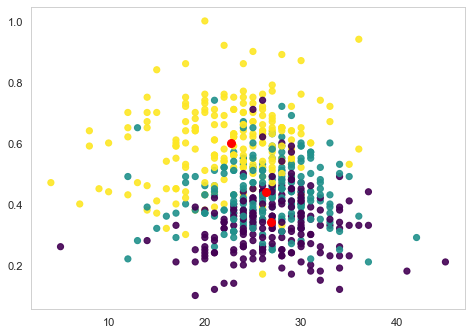

In [33]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

figure(figsize=(7, 5), dpi=80)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis', alpha=0.9)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)  
plt.show()

We can verify that there are no apparent clusters in this dataset.